# IBM HR Analytics Employee Attrition & Performance
## Main objectives:

- Read csv file and do some EDA 
- Visualize data and relationship between features (numerical vs categorical)
- Histogram, countplot, distribution plot, pie chart, and heatmap
- Data cleaning (encode categorical features and drop highly-correlated features)
- Understand features affecting attrition
- Balance the dataset
- Fit the following ML models (Logistic Regression, Decision Tree, Linear Discriminant Analysis, Random Forest Classifier, Support Vector Classifier, KNeighbors Classifier, and Naive Bayes)
- Dataset link: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

## Import libraries

In [143]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score

In [18]:
df = pd.read_csv("data/IBM_HR_Analytics.csv")
df_copy = df.copy()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [20]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [22]:
# Sanity check
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [23]:
# Find categorical features
obj_df = df.select_dtypes(include=["object"])
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   JobRole         1470 non-null   object
 6   MaritalStatus   1470 non-null   object
 7   Over18          1470 non-null   object
 8   OverTime        1470 non-null   object
dtypes: object(9)
memory usage: 103.5+ KB


In [26]:
# Print unique values
for col in obj_df:
    print(f"{col}: {obj_df[col].unique()}")

Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
Over18: ['Y']
OverTime: ['Yes' 'No']


In [29]:
# Print group count of each categorical features 
for col in obj_df:
    print(f"{col}: \n{obj_df[col].value_counts()}\n")

Attrition: 
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel: 
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Department: 
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

EducationField: 
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Gender: 
Male      882
Female    588
Name: Gender, dtype: int64

JobRole: 
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

MaritalStatus: 
Married     673
Single      470
Divorced    327
Name:

**Notice this dataset is imbalanced with 1233 non-churners and 237 churners**

In [95]:
# Categorical values represent types of data which may be divided into groups, so convert object to category
# Convert object to category 
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('object'))
# Reorder BusinessTravel
#df['BusinessTravel'] = df['BusinessTravel'].cat.reorder_categories(['Non-Travel', 'Travel_Rarely','Travel_Frequently'])

## Visualize data

### Numeric values

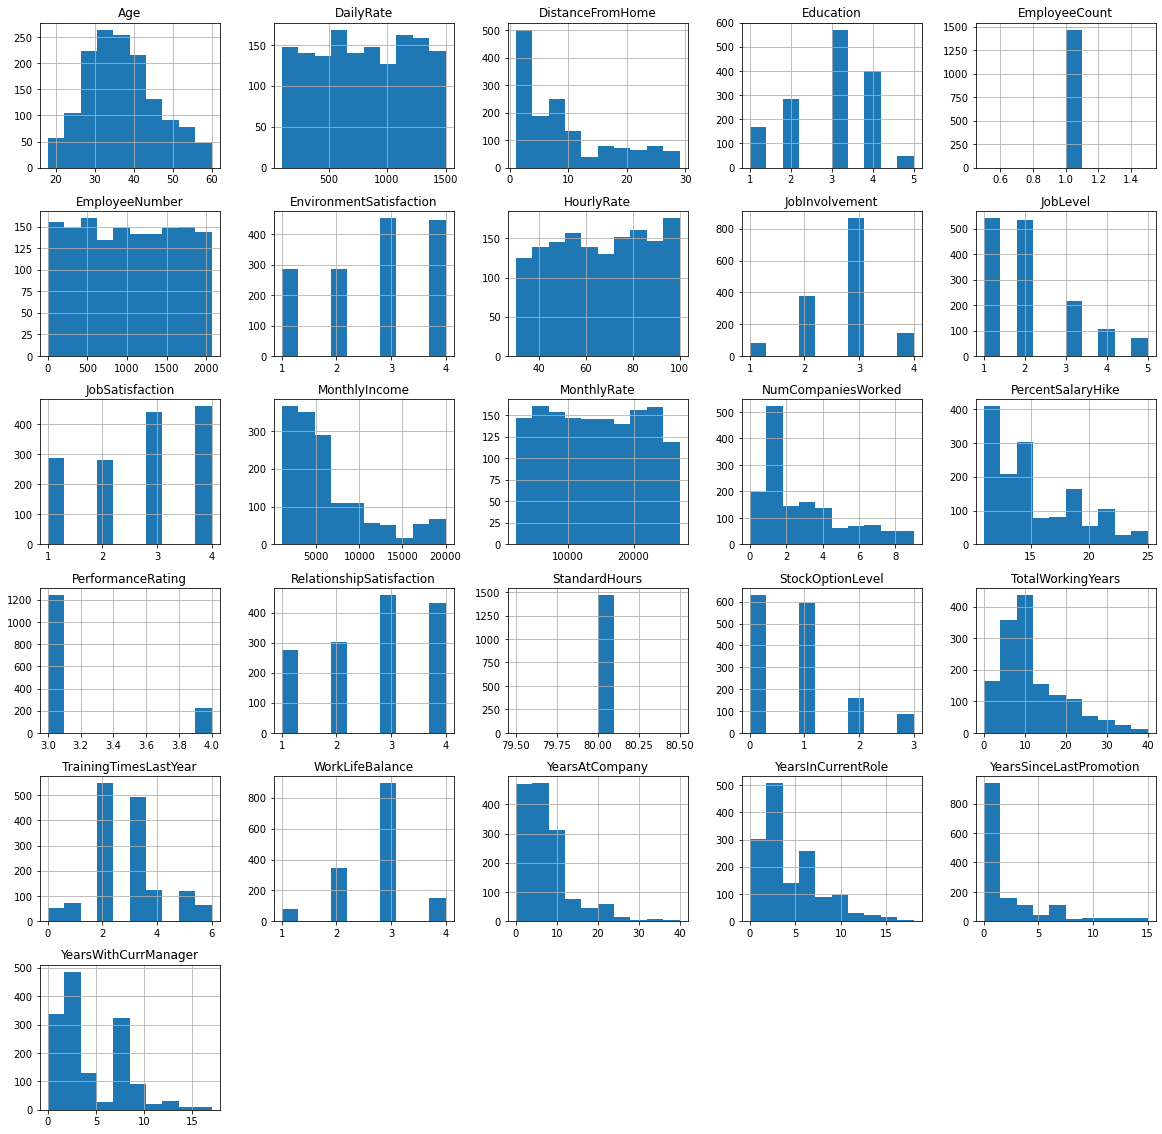

In [31]:
# Plot histogram for numerical values
df.hist(figsize=(20,20))
plt.show()

In [245]:
# Drop useless variables
df.drop(['EmployeeCount', 'EmployeeNumber','StandardHours', 'Over18'], axis=1, inplace=True)

**Employee's age ranges between 25 and 45. Most employee commutes less than 10 miles to work. Most employee have less than 11 years of experience.
There are some useless features such as EmployeeCount and Standardhours because it remains contant throughout the dataset
Skewness: DistanceFromHome, JobLevel, MonthlyIncome, NumCompanyWorked, PercentSalaryHike, PerformanceRating, etc**

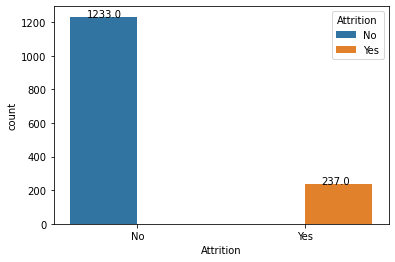

In [45]:
# Plot the bar graph to display attrition count
ax = sns.countplot(x='Attrition',data=df, hue='Attrition')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+0.01))
plt.show()

<AxesSubplot:ylabel='Attrition'>

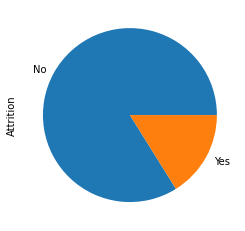

In [55]:
# Plot pie chart
df.groupby('Attrition')['Attrition'].count().plot(kind='pie')

In [68]:
# Percentage of employee leaving the company
print(f"Percentage of employee leaving the company: {len(df[df['Attrition'] == 'Yes'])/len(df)*100}%")

Percentage of employee leaving the company: 16.122448979591837%


**237 out of 1470 employees have left the company which is about 16%.**

<AxesSubplot:xlabel='Attrition', ylabel='count'>

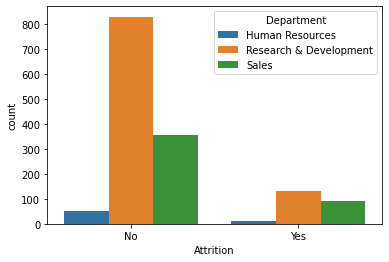

In [74]:
# Let's see how many employee leaving in each department
# Plot pie chart
sns.countplot(x='Attrition',data=df, hue='Department')

**We can see that Research & Development Department has high number of employee staying and leaving the company. But we should also consider the percentage of each department to have a broader view.**

In [116]:
# Count each department
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

{'Sales': 20.62780269058296, 'Research & Development': 13.839750260145681, 'Human Resources': 19.047619047619047}


<BarContainer object of 3 artists>

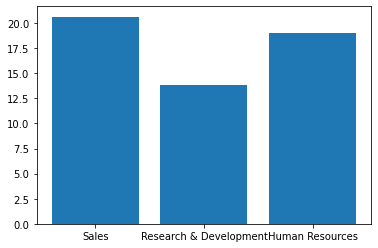

In [117]:
# Percentage of employee leaving the company in each department
percent_leave_depart = {}
for depart in df['Department'].unique():
    depart_count = df[df['Department'] == depart].shape[0]
    yes_per = len(df[(df['Department'] == depart) & (df['Attrition'] == 'Yes')])/depart_count*100
    percent_leave_depart[depart] = yes_per
print(percent_leave_depart)
plt.bar(percent_leave_depart.keys(), percent_leave_depart.values())

**Research & Development has the highest number of employees who have left, but it still has the lowest attrition rate of all departments. Sales department has the highest attrition rate.**

In [130]:
# Department groupby sector
depart_sector = df.groupby('Department')

In [132]:
# Summary statistics for each department in each numerical feature
depart_sector['HourlyRate'].describe()

,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
Human Resources,63.0,64.301587,21.562090,30.0,47.0,59.0,85.5,100.0
Research & Development,961.0,66.167534,20.249281,30.0,49.0,66.0,84.0,100.0
Sales,446.0,65.520179,20.354461,30.0,48.0,66.0,83.0,100.0


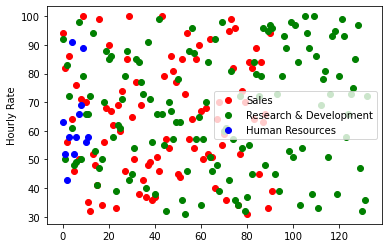

In [154]:
# Plot scatterplot to see hourly rate of employees have left for each department
def plot_scatter():
    depart_list = df['Department'].unique()
    colors = ['red','green','blue']
    for i, depart in enumerate (depart_list):
        y = df[(df['Department'] == depart) & (df['Attrition'] == 'Yes')].HourlyRate
        x = np.arange(y.shape[0]) 
        plt.scatter(x, y, c=colors[i],label=depart)
        plt.ylabel('Hourly Rate')
    plt.legend()
    plt.show()
plot_scatter()

**The hourly rate for churners is kind of distributed all over the place**

In [161]:
# Import libraries for data visualization
from IPython.display import display
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

init_notebook_mode(connected=True) 

In [207]:
len(df['JobRole'].unique())

9

In [210]:
# Notice that we can have duplicated job role for departments such as Mangaer in Sales and Manager in R&D
df.groupby('JobRole').get_group('Manager').head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,...,3,80,0,31,3,3,25,8,3,7
25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,32,...,4,80,1,26,3,2,14,13,4,8
29,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,38,...,4,80,0,22,2,2,2,2,2,1
65,55,No,Travel_Rarely,836,Research & Development,8,3,Medical,1,84,...,3,80,3,21,2,3,5,0,0,2
105,59,No,Non-Travel,1420,Human Resources,2,4,Human Resources,1,140,...,4,80,1,30,3,3,3,2,2,2


In [216]:
df.groupby('JobRole').get_group('Manager').Department.unique()

['Sales', 'Research & Development', 'Human Resources']
Categories (3, object): ['Sales', 'Research & Development', 'Human Resources']

{'Laboratory Technician \n R&D': 26.160337552742618, 'Sales Executive \n Sales': 24.050632911392405, 'Research Scientist \n R&D': 19.831223628691983, 'Sales Representative \n Sales': 13.924050632911392, 'Human Resources \n HR': 5.063291139240507, 'Manufacturing Director \n R&D': 4.219409282700422, 'Healthcare Representative \n R&D': 3.79746835443038, 'Manager \n R&D': 1.2658227848101267, 'Manager \n Sales': 0.8438818565400843, 'Research Director \n R&D': 0.8438818565400843, 'Manager \n HR': 0.0}


<BarContainer object of 11 artists>

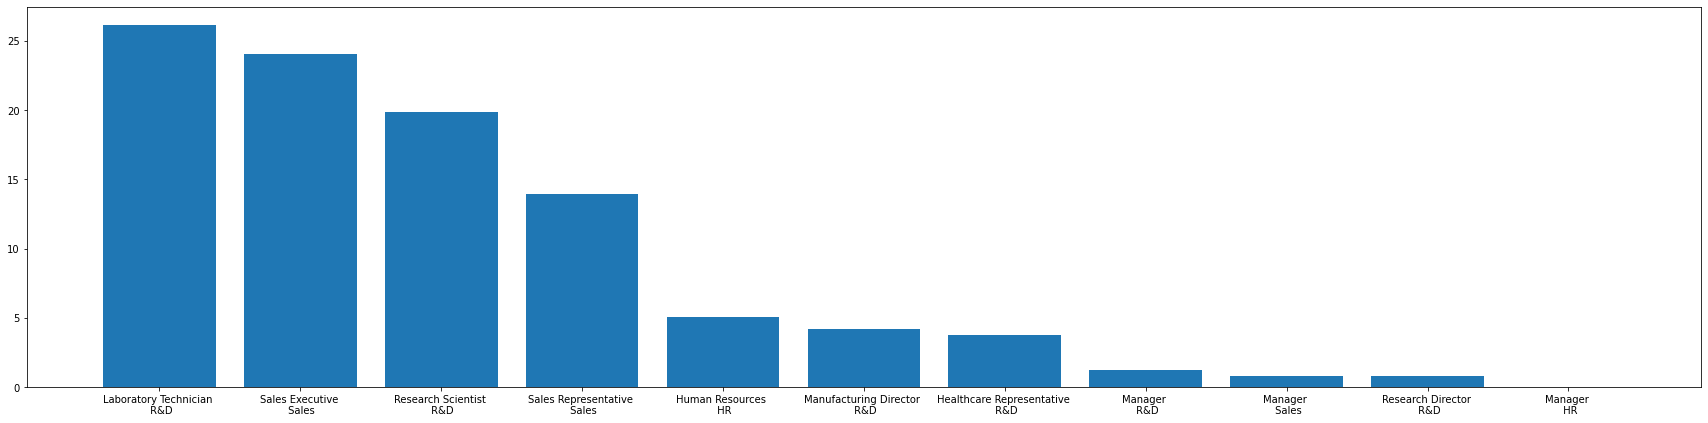

In [221]:
# Replace lengthy names of departments
df['Department'] = df['Department'].str.replace('Research & Development', "R&D", case=False)
df['Department'] = df['Department'].str.replace('Human Resources', "HR", case=False)
percent_leave_role = {}
total_employee_left = len(df[df['Attrition'] == 'Yes'])
for role in df['JobRole'].unique():
    departments = df.groupby('JobRole').get_group(role).Department.unique()
    for depart in departments:
        yes_per = len(df[(df['JobRole'] == role) & (df['Attrition'] == 'Yes') & (df['Department'] == depart)])/total_employee_left*100
        combined = role + " \n " + depart
        percent_leave_role[combined] = yes_per
        
sorted_percent_leave_role = dict(sorted(percent_leave_role.items(), key=lambda x: x[1], reverse=True))
print(sorted_percent_leave_role)
plt.figure(figsize=(30, 7))
plt.bar(sorted_percent_leave_role.keys(), sorted_percent_leave_role.values())

In [226]:
# Check Manager of HR to make sure the value 0.0 is correct
df[(df['JobRole'] == 'Manager') & (df['Department'] == 'HR')]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
105,59,No,Non-Travel,1420,HR,2,4,Human Resources,1,140,...,4,80,1,30,3,3,3,2,2,2
112,54,No,Non-Travel,142,HR,26,3,Human Resources,1,148,...,3,80,0,23,3,3,5,3,4,4
477,50,No,Travel_Frequently,1246,HR,3,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
535,41,No,Travel_Rarely,427,HR,10,4,Human Resources,1,731,...,2,80,3,23,2,2,21,6,12,6
538,41,No,Travel_Rarely,314,HR,1,3,Human Resources,1,734,...,2,80,1,22,3,3,22,7,2,10
956,56,No,Travel_Rarely,206,HR,8,4,Life Sciences,1,1338,...,1,80,0,36,4,3,7,3,7,7
962,51,No,Travel_Rarely,770,HR,5,3,Life Sciences,1,1352,...,2,80,1,33,2,3,33,9,0,10
999,42,No,Travel_Rarely,1147,HR,10,3,Human Resources,1,1408,...,3,80,1,21,5,3,20,7,0,9
1096,40,No,Travel_Rarely,898,HR,6,2,Medical,1,1550,...,4,80,0,21,2,3,21,7,7,7
1154,47,No,Travel_Rarely,1176,HR,26,4,Life Sciences,1,1625,...,3,80,1,27,2,3,5,2,1,0


### Other method - Check attrition rate within that department to see which department and job role has the highest attrition rate

In [227]:
# Other method
grouped = df.groupby(["Department","JobRole","Attrition"])
output = pd.DataFrame()
output['n'] = grouped["Attrition"].count()

# Identifying sub-categories within cohorts
output['pct'] = output['n'].groupby("JobRole").transform(lambda x: x/x.sum())

# Reset index 
output = output.reset_index()

# Filter for only employees who have left 
output_yes = output[output["Attrition"] == "Yes"]

# Replace long dept names with acronyms
output_yes['Department'] = output_yes['Department'].str.replace('Research & Development', "R&D", case=False)
output_yes['Department'] = output_yes['Department'].str.replace('Human Resources', "HR", case=False)

# Add column with combined dept & job role
output_yes['dept_jobrole'] = output_yes['Department'].str.cat(output_yes[['JobRole']], sep=' : ')

# Sort in ascending order for plotting
output_yes = output_yes.sort_values('pct', ascending=True)

# Change decimal to integer for readability 
output_yes['pct'] = output_yes['pct'] * 100

# Plotly object: Attrition Count by Dept
p = [go.Bar(x = output_yes.dept_jobrole, 
            y = output_yes.pct,
            text=output_yes.pct.round(decimals=2),
            textposition = 'outside',
            orientation = 'v',
            opacity=0.6, 
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5)))]

# Pieces of Flair
layout = go.Layout(title='Attrition Rate by Job Role',
                   yaxis=dict(title="Percent"),
                   margin = dict(b = 120
  ))
fig = go.Figure(data=p, layout=layout)

# Plot it
py.offline.iplot(fig)

<ipython-input-227-876d88624b64>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-227-876d88624b64>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-227-876d88624b64>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [240]:
# Sanity check
output_yes

,Department,JobRole,Attrition,n,pct,dept_jobrole
1,HR,Healthcare Representative,Yes,0,0.000000,HR : Healthcare Representative
37,Sales,Healthcare Representative,Yes,0,0.000000,Sales : Healthcare Representative
35,R&D,Sales Representative,Yes,0,0.000000,R&D : Sales Representative
33,R&D,Sales Executive,Yes,0,0.000000,R&D : Sales Executive
45,Sales,Manufacturing Director,Yes,0,0.000000,Sales : Manufacturing Director
47,Sales,Research Director,Yes,0,0.000000,Sales : Research Director
39,Sales,Human Resources,Yes,0,0.000000,Sales : Human Resources
17,HR,Sales Representative,Yes,0,0.000000,HR : Sales Representative
21,R&D,Human Resources,Yes,0,0.000000,R&D : Human Resources
13,HR,Research Scientist,Yes,0,0.000000,HR : Research Scientist


In [241]:
# Sanity check
output

,Department,JobRole,Attrition,n,pct
0,HR,Healthcare Representative,No,0,0.000000
1,HR,Healthcare Representative,Yes,0,0.000000
2,HR,Human Resources,No,40,0.769231
3,HR,Human Resources,Yes,12,0.230769
4,HR,Laboratory Technician,No,0,0.000000
5,HR,Laboratory Technician,Yes,0,0.000000
6,HR,Manager,No,11,0.107843
7,HR,Manager,Yes,0,0.000000
8,HR,Manufacturing Director,No,0,0.000000
9,HR,Manufacturing Director,Yes,0,0.000000


**Overall, Laboratory Technician (R&D) has the highest attrition rate when comparing in the whole dataset. However, if we want to see which department has the highest rate of attrition within that department, Sales Representatives (Sales) has the highest rate**

### Correlation

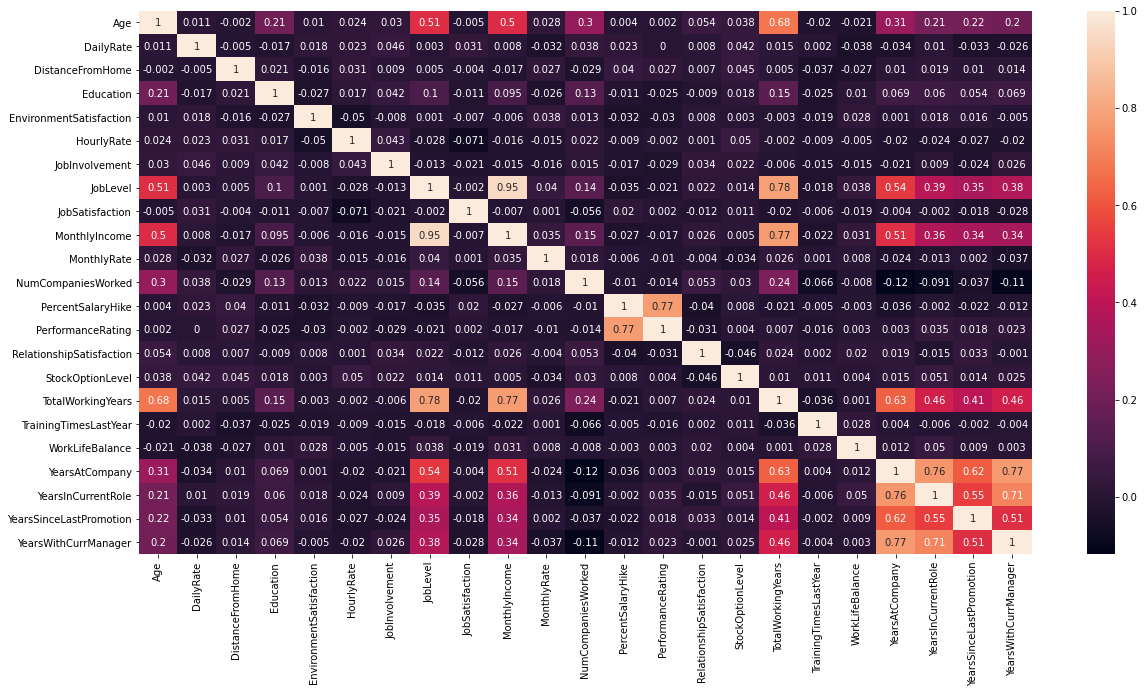

In [265]:
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df.corr().round(decimals=3),annot=True)
plt.show()

In [292]:
# Make a copy 
df_temp = df.copy()

# Convert target variable from object to integer so we can fit it into correlation map
df_temp['Attrition'] = df_temp['Attrition'].apply(lambda x: 0 if x == 'No' else 1).astype('int')

# Create a correlation matrix
corr_metrics = df_temp.corr().round(decimals=3)

print('Most Positive Correlations:\n', corr_metrics['Attrition'].sort_values().tail(5))
print('\nMost Negative Correlations:\n', corr_metrics['Attrition'].sort_values().head(5))
corr_metrics.style.background_gradient(cmap='Blues')

Most Positive Correlations:
 PerformanceRating     0.003
MonthlyRate           0.015
NumCompaniesWorked    0.043
DistanceFromHome      0.078
Attrition             1.000
Name: Attrition, dtype: float64

Most Negative Correlations:
 TotalWorkingYears    -0.171
JobLevel             -0.169
YearsInCurrentRole   -0.161
MonthlyIncome        -0.160
Age                  -0.159
Name: Attrition, dtype: float64


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159000,0.011000,-0.002000,0.208000,0.010000,0.024000,0.030000,0.510000,-0.005000,0.498000,0.028000,0.300000,0.004000,0.002000,0.054000,0.038000,0.680000,-0.020000,-0.021000,0.311000,0.213000,0.217000,0.202000
Attrition,-0.159000,1.000000,-0.057000,0.078000,-0.031000,-0.103000,-0.007000,-0.130000,-0.169000,-0.103000,-0.160000,0.015000,0.043000,-0.013000,0.003000,-0.046000,-0.137000,-0.171000,-0.059000,-0.064000,-0.134000,-0.161000,-0.033000,-0.156000
DailyRate,0.011000,-0.057000,1.000000,-0.005000,-0.017000,0.018000,0.023000,0.046000,0.003000,0.031000,0.008000,-0.032000,0.038000,0.023000,0.000000,0.008000,0.042000,0.015000,0.002000,-0.038000,-0.034000,0.010000,-0.033000,-0.026000
DistanceFromHome,-0.002000,0.078000,-0.005000,1.000000,0.021000,-0.016000,0.031000,0.009000,0.005000,-0.004000,-0.017000,0.027000,-0.029000,0.040000,0.027000,0.007000,0.045000,0.005000,-0.037000,-0.027000,0.010000,0.019000,0.010000,0.014000
Education,0.208000,-0.031000,-0.017000,0.021000,1.000000,-0.027000,0.017000,0.042000,0.102000,-0.011000,0.095000,-0.026000,0.126000,-0.011000,-0.025000,-0.009000,0.018000,0.148000,-0.025000,0.010000,0.069000,0.060000,0.054000,0.069000
EnvironmentSatisfaction,0.010000,-0.103000,0.018000,-0.016000,-0.027000,1.000000,-0.050000,-0.008000,0.001000,-0.007000,-0.006000,0.038000,0.013000,-0.032000,-0.030000,0.008000,0.003000,-0.003000,-0.019000,0.028000,0.001000,0.018000,0.016000,-0.005000
HourlyRate,0.024000,-0.007000,0.023000,0.031000,0.017000,-0.050000,1.000000,0.043000,-0.028000,-0.071000,-0.016000,-0.015000,0.022000,-0.009000,-0.002000,0.001000,0.050000,-0.002000,-0.009000,-0.005000,-0.020000,-0.024000,-0.027000,-0.020000
JobInvolvement,0.030000,-0.130000,0.046000,0.009000,0.042000,-0.008000,0.043000,1.000000,-0.013000,-0.021000,-0.015000,-0.016000,0.015000,-0.017000,-0.029000,0.034000,0.022000,-0.006000,-0.015000,-0.015000,-0.021000,0.009000,-0.024000,0.026000
JobLevel,0.510000,-0.169000,0.003000,0.005000,0.102000,0.001000,-0.028000,-0.013000,1.000000,-0.002000,0.950000,0.040000,0.143000,-0.035000,-0.021000,0.022000,0.014000,0.782000,-0.018000,0.038000,0.535000,0.389000,0.354000,0.375000
JobSatisfaction,-0.005000,-0.103000,0.031000,-0.004000,-0.011000,-0.007000,-0.071000,-0.021000,-0.002000,1.000000,-0.007000,0.001000,-0.056000,0.020000,0.002000,-0.012000,0.011000,-0.020000,-0.006000,-0.019000,-0.004000,-0.002000,-0.018000,-0.028000


**Features have strong correlations with each other, then they may be considered redundant such as JobLevel and MonthlyIncome. We can drop one of these features.**

<AxesSubplot:title={'center':'MonthlyRate'}, xlabel='Attrition'>

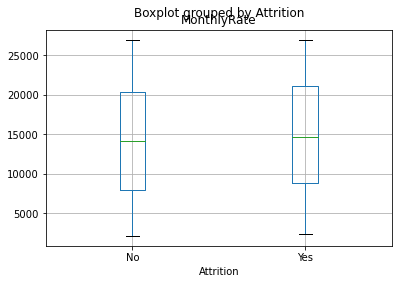

In [282]:
df.boxplot(column='MonthlyRate', by = 'Attrition') 

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

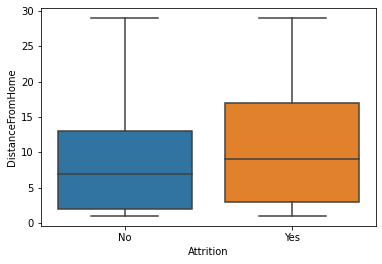

In [283]:
sns.boxplot(x = 'Attrition', y = 'DistanceFromHome', data = df)

### Categorical features

In [375]:
# Create function to calculate percentage of employees left by features
def percentage_features(feature):
    feature_dict = {}
    feature_values = df[feature].unique()
    for value in feature_values:
        churners = df[(df[feature] == value) & (df['Attrition'] == 'Yes')]
        feature_total = len(df[df[feature] == value])
        #print(feature_total)
        feature_dict[value] = len(churners)/feature_total*100
    sorted_percentage_feature = dict(sorted(feature_dict.items(), key=lambda x: x[1], reverse=True))
    print(sorted_percentage_feature)
    plt.figure(figsize = (20, 7))
    plt.bar(sorted_percentage_feature.keys(), sorted_percentage_feature.values())
    

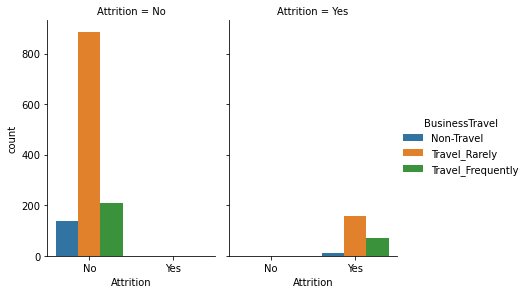

In [352]:
sns.catplot(x="Attrition", hue="BusinessTravel", col="Attrition",
                data=df, kind="count",
                height=4, aspect=.7);

**Travel_Rarely has the highest total number of employees who left the company**

{'Travel_Frequently': 24.90974729241877, 'Travel_Rarely': 14.956855225311601, 'Non-Travel': 8.0}


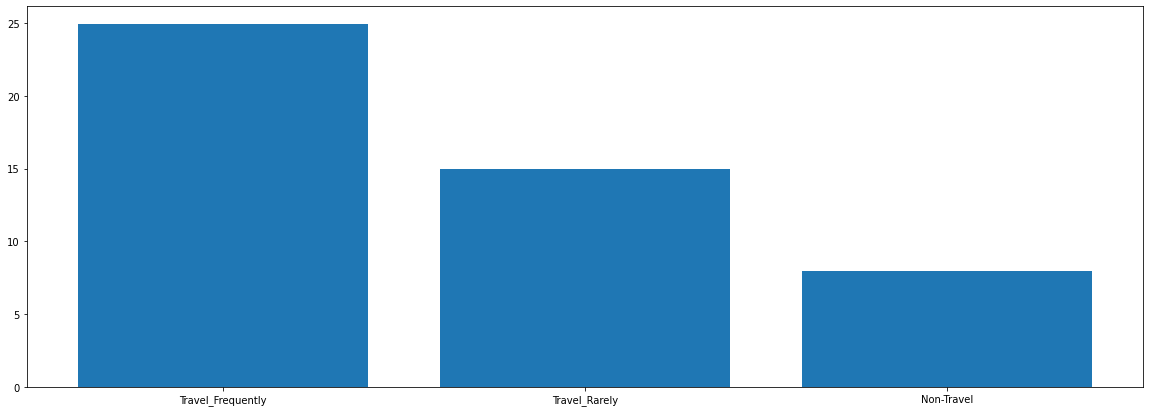

In [376]:
percentage_features('BusinessTravel')

**Employees who travel frequently tend to be churners.**

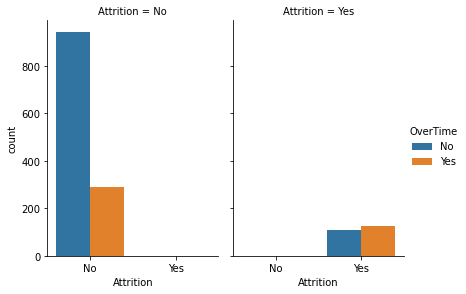

In [367]:
sns.catplot(x="Attrition", hue="OverTime", col="Attrition",
                data=df, kind="count",
                height=4, aspect=.7);

**The number of employees who left worked overtime is about the same as those who did not work overtime.**

{'Yes': 30.528846153846157, 'No': 10.436432637571158}


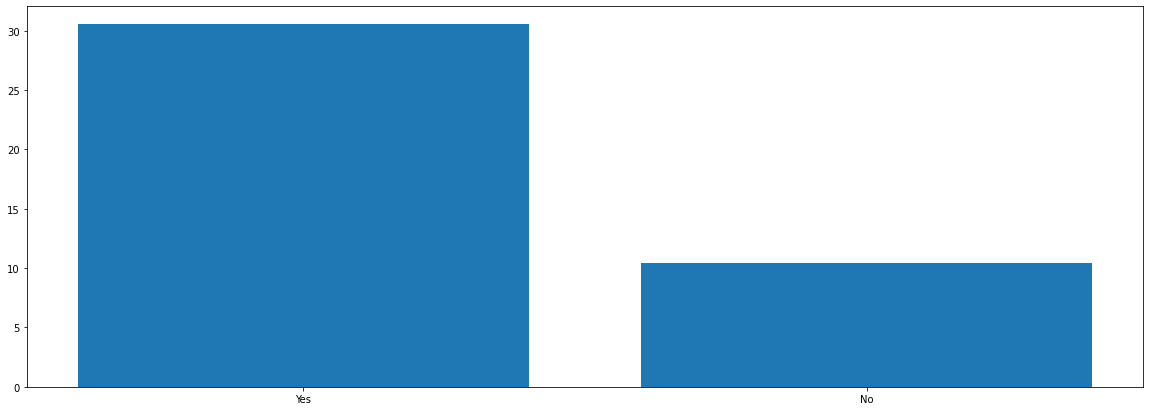

In [378]:
percentage_features('OverTime')

**Percentage of those who left worked overtime is three times to those who did not work overtime**

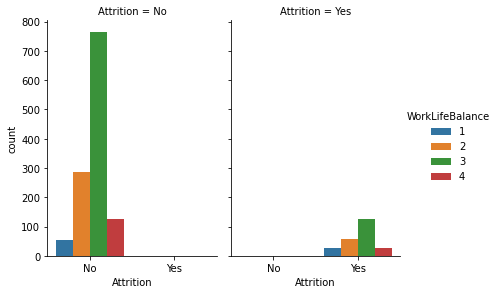

In [370]:
sns.catplot(x="Attrition", hue="WorkLifeBalance", col="Attrition",
                data=df, kind="count",
                height=4, aspect=.7);

{1: 31.25, 4: 17.647058823529413, 2: 16.86046511627907, 3: 14.221724524076148}


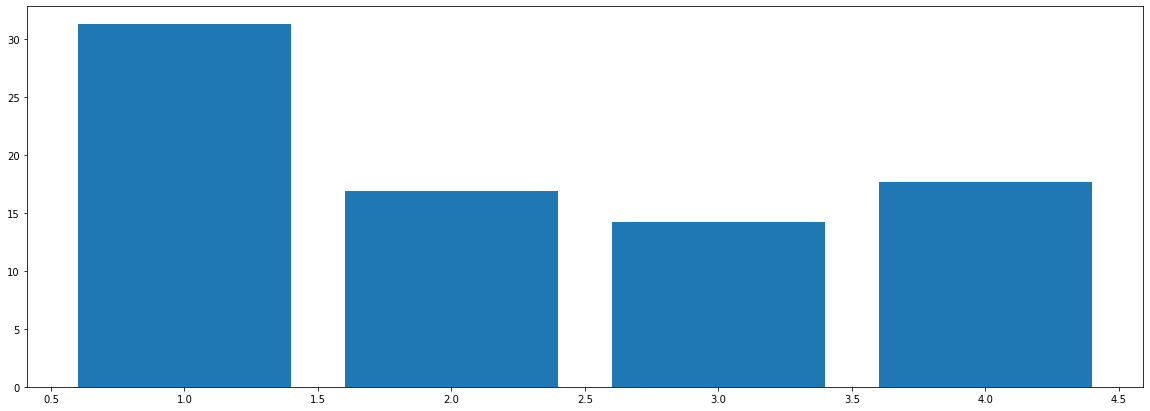

In [379]:
#  Percentafe of employees who left with different WorkLifeBalance
#1 'Bad'
#2 'Good'
#3 'Better'
#4 'Best'
percentage_features('WorkLifeBalance')

**Employees who had bad work life balance tend to leave the company about 3 times higher than the other group**

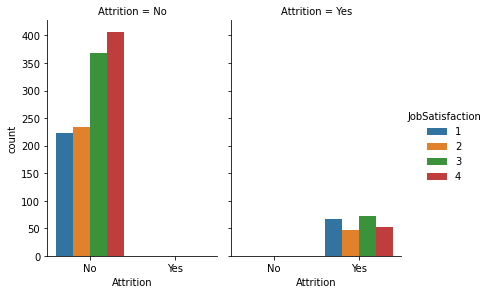

In [373]:
sns.catplot(x="Attrition", hue="JobSatisfaction", col="Attrition",
                data=df, kind="count",
                height=4, aspect=.7);

{1: 22.837370242214533, 3: 16.515837104072396, 2: 16.428571428571427, 4: 11.328976034858387}


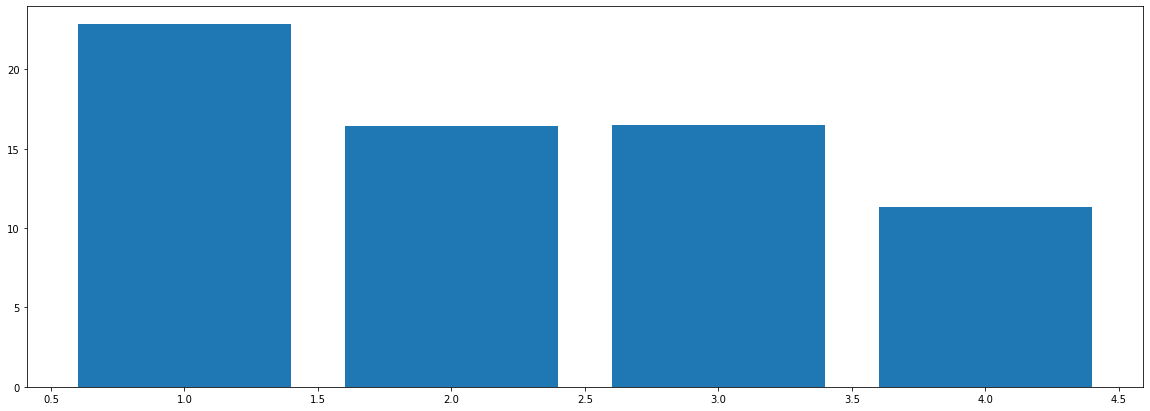

In [380]:
percentage_features('JobSatisfaction')

**Employees who had low job satisfaction tend to leave the company**

## Model

In [293]:
# Drop highly-correlated variables
df_temp.drop(['MonthlyIncome'], axis=1, inplace=True)


In [294]:
# Encode BusinessTravel
df_temp.BusinessTravel = df_temp.BusinessTravel.map({'Non-Travel':0,'Travel_Rarely':1, 'Travel_Frequently':2})
# Encode MaritalStatus
df_temp.MaritalStatus = df_temp.MaritalStatus.map({'Single': 1, 'Married':2, 'Divorced':0})


In [295]:
# Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

le_count = 0
for col in df_temp.columns:
    if df_temp[col].dtype != 'int64':
        # columns with 2 or less unique values
        if len(list(df_temp[col].unique())) <= 2:
            le.fit(df_temp[col])
            df_temp[col] = le.transform(df_temp[col])
            le_count += 1
            print(col)
print(f"{le_count} columns are encoded")

Gender
OverTime
2 columns are encoded


In [297]:
df_temp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,R&D,8,1,Life Sciences,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,R&D,2,2,Other,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,R&D,3,4,Life Sciences,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,R&D,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2


In [298]:
# Turn categorical variables into dummy variables
df_dummy = pd.get_dummies(df_temp, drop_first=True) # Avoid dummy trap
df_dummy.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_2,MaritalStatus_1
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,0,1,0,0,0,0,0,0,1,0


### Imbalanced Dataset

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# target
Y = df_dummy['Attrition']

# Drop target
X = df_dummy.drop("Attrition",axis=1)

# 80% training set and 20% testing set
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Check shape of the data
print("Shape of Train Features: ", X_train.shape) 
print("Shape of Train Labels: ", Y_train.shape) 
print("Shape of Test Features: ", X_test.shape) 
print("Shape of Test Labels: ", Y_test.shape) 

Shape of Train Features:  (1176, 43)
Shape of Train Labels:  (1176,)
Shape of Test Features:  (294, 43)
Shape of Test Labels:  (294,)


In [309]:
# Create logistic regression model
model = LogisticRegression()

# Train the model using the training sets
model.fit(X_train,Y_train)

#Predict Output
predicted= model.predict(X_test)

print(f"Accuracy score: {accuracy_score(Y_test,predicted)}")

cr = classification_report(Y_test, predicted)
print(cr)
cm = confusion_matrix(Y_test, predicted)
print(cm)

Accuracy score: 0.8639455782312925
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.86       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.86      0.80       294

[[254   1]
 [ 39   0]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**We can see the accuracy is pretty high, but it is driven by the ability of classifying the non-churners. This dataset is imbalanced with 237 churners and 1233 non-churners, so we will try to balance this dataset and train a new model. However, reducing the dataset will not guarantee a better performance since the dataset size is significantly reduced and not much information obtained**

### Balance dataset

In [343]:
# Get churners
churners_balanced = df_dummy.loc[df_dummy['Attrition'] == 1]
print(len(churners_balanced))

# Get non-churners
non_balanced = df_dummy.loc[df_dummy['Attrition'] == 0].sample(len(churners_balanced), random_state=10)
print(len(non_balanced))

# Concatenate the dataframes no_only and yes_only
df_balanced = pd.concat([churners_balanced, no_balanced])
print(len(df_balanced))

# target
Y_balanced = df_balanced['Attrition']

# Drop target
X_balanced = df_balanced.drop("Attrition",axis=1)

# 80% training set and 20% testing set
X_train,X_test,Y_train,Y_test = train_test_split(X_balanced, Y_balanced, test_size=0.20, random_state=42)

# Check shape of the data
print("Shape of Train Features: ", X_train.shape) 
print("Shape of Train Labels: ", Y_train.shape) 
print("Shape of Test Features: ", X_test.shape) 
print("Shape of Test Labels: ", Y_test.shape) 

237
237
474
Shape of Train Features:  (379, 43)
Shape of Train Labels:  (379,)
Shape of Test Features:  (95, 43)
Shape of Test Labels:  (95,)


In [344]:
# Create logistic regression model
model = LogisticRegression()

# Train the model using the training sets
model.fit(X_train,Y_train)

#Predict Output
predicted = model.predict(X_test)

print(f"Accuracy score: {accuracy_score(Y_test,predicted)}")

cr = classification_report(Y_test, predicted)
print(cr)
cm = confusion_matrix(Y_test, predicted)
print(cm)

Accuracy score: 0.6421052631578947
              precision    recall  f1-score   support

           0       0.65      0.62      0.64        48
           1       0.63      0.66      0.65        47

    accuracy                           0.64        95
   macro avg       0.64      0.64      0.64        95
weighted avg       0.64      0.64      0.64        95

[[30 18]
 [16 31]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**We can see that the accuracy for this time is not high as an imbalanced dataset, but we're no longer having a favor of non-churners. We will be testing other classifiers below**

### Fit the other models

In [345]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

models = []
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K-Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

print(models)

[('Logistic Regression', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()), ('Random Forest', RandomForestClassifier()), ('Support Vector Classifier', SVC()), ('K-Neirest Neighbour', KNeighborsClassifier()), ('Naive Bayes', GaussianNB())]


In [348]:
# Use K-Fold cross validation
def fit_model_kfold(models_list):
    names = []
    result_mean = []
    for name,model in models:
        kfold = KFold(n_splits=20)
        result = cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
        names.append(name)
        result_mean.append(result.mean())
        #print(model)
    return names,result_mean 

name,mean = fit_model_kfold(models)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages

In [349]:
print("Accuracy of different classifiers:\n")
for index,name in enumerate(name):
    accu = mean[index]*100
    print(f"{name}: {accu.round(3)}")

Accuracy of different classifiers:

Logistic Regression: 61.725
Decision Tree: 57.237
Linear Discriminant Analysis: 68.816
Random Forest: 68.026
Support Vector Classifier: 47.208
K-Neirest Neighbour: 54.094
Naive Bayes: 68.538


In [351]:
# Get accuracy and classification report for each classifier
def fit_model_report(models_list):
    names = []
    result_mean = []
    for name,model in models:
        print(name)
        # Train the model using the training sets
        model.fit(X_train,Y_train)

        #Predict Output
        predicted_train = model.predict(X_train)
        predicted_test = model.predict(X_test)

        print(f"Training Accuracy: {accuracy_score(Y_train,predicted_train).round(3)*100}")
        print(f"Testing Accuracy: {accuracy_score(Y_test,predicted_test).round(3)*100}")
        
        print("Classification report for TESTING SET")
        cr = classification_report(Y_test, predicted_test)
        print(cr)
        print("\n")

fit_model_report(models)

Logistic Regression
Training Accuracy: 69.69999999999999
Testing Accuracy: 64.2
Classification report for TESTING SET
              precision    recall  f1-score   support

           0       0.65      0.62      0.64        48
           1       0.63      0.66      0.65        47

    accuracy                           0.64        95
   macro avg       0.64      0.64      0.64        95
weighted avg       0.64      0.64      0.64        95



Decision Tree
Training Accuracy: 100.0
Testing Accuracy: 60.0
Classification report for TESTING SET
              precision    recall  f1-score   support

           0       0.61      0.58      0.60        48
           1       0.59      0.62      0.60        47

    accuracy                           0.60        95
   macro avg       0.60      0.60      0.60        95
weighted avg       0.60      0.60      0.60        95



Linear Discriminant Analysis
Training Accuracy: 78.10000000000001
Testing Accuracy: 73.7
Classification report for TESTING S

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Training Accuracy: 53.300000000000004
Testing Accuracy: 45.300000000000004
Classification report for TESTING SET
              precision    recall  f1-score   support

           0       0.41      0.19      0.26        48
           1       0.47      0.72      0.57        47

    accuracy                           0.45        95
   macro avg       0.44      0.46      0.41        95
weighted avg       0.44      0.45      0.41        95



K-Neirest Neighbour
Training Accuracy: 71.5
Testing Accuracy: 49.5
Classification report for TESTING SET
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        48
           1       0.49      0.60      0.54        47

    accuracy                           0.49        95
   macro avg       0.50      0.50      0.49        95
weighted avg       0.50      0.49      0.49        95



Naive Bayes
Training Accuracy: 73.4
Testing Accuracy: 76.8
Classification report for TESTING SET
              precision    

**For this particular dataset, we care more about churners than non-churners, so Recall is very important in giving up false positives (incorrectly targeted stayers) in order to gain some false negatives (correctly predicted churners). Moreover, churners will affect the cost of business more than non-churners**